In [1]:
# Numerical Differentiation

import sympy as sy
import numpy as np
from matplotlib import pyplot as plt
from autograd import numpy as anp
from autograd import grad, elementwise_grad


# Problem 1

df= (-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))


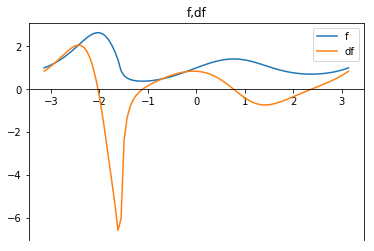

In [2]:
x = sy.symbols('x')
f = (sy.sin(x) + 1)**sy.sin(sy.cos(x))
df = sy.diff(f)
df2 = sy.diff(df)
df3 = sy.diff(df2)
df4 = sy.diff(df3)

print('df=',df)

f = sy.lambdify(x,f,'numpy')
df = sy.lambdify(x,df,'numpy')
df2 = sy.lambdify(x,df2,'numpy')
df4 = sy.lambdify(x,df4,'numpy')

x = np.linspace(-np.pi,np.pi,100)

f_disc= f(x)
df_disc = df(x)

plt.figure()
plt.plot(x,f_disc, label='f')
plt.plot(x,df_disc, label='df')
plt.title('f,df')
plt.legend()
ax = plt.gca()
ax.spines["bottom"].set_position("zero")


# Problem 2

h= 0.06283185307179587


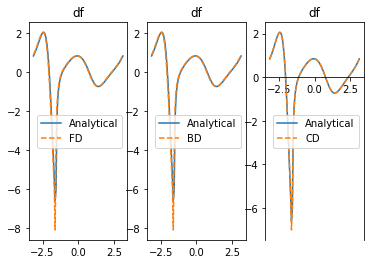

In [3]:
## Forward
def df_fw(f,x0,h):
    df = (f(x0+h)-f(x0))/h
    return df

def df2_fw(f,x0,h):
    df = (-3*f(x0)+4*f(x0+h)-f(x0+2*h))/(2*h) 
    return df

## Backward
def df_bw(f,x0,h):
    df = (f(x0)-f(x0-h))/h 
    return df

def df2_bw(f,x0,h):
    df = (3*f(x0)-4*f(x0-h)+f(x0-2*h))/(2*h)
    return df

## Centered
def df_c(f,x0,h):
    df = (f(x0+h)-f(x0-h))/(2*h)
    return df

def df2_c(f,x0,h):
    df = (f(x0-2*h)-8*f(x0-h)+8*f(x0+h)-f(x0+2*h))/(12*h)  
    return df

grid_pts = 100
x = np.linspace(-np.pi,np.pi,grid_pts)
h = (x[-1]-x[0]) / grid_pts
print('h=',h)

fd_df_eval = np.zeros(grid_pts)
bd_df_eval = np.zeros(grid_pts)
cd_df_eval = np.zeros(grid_pts)

#forward diff
for jj, x0 in enumerate(x):
    fd_df_eval[jj] = df_fw(f,x0,h)
    if jj == grid_pts:
      break
    
plt.subplot(131)
plt.plot(x,df_disc,label='Analytical')
plt.plot(x,fd_df_eval,'--',label='FD')
plt.legend(loc=7)
plt.title('df')
ax.spines["bottom"].set_position("zero")


#backward diff
for jj, x0 in enumerate(x):
    bd_df_eval[jj] = df_fw(f,x0,h)
    
plt.subplot(132)
plt.plot(x,df_disc,label='Analytical')
plt.plot(x,bd_df_eval,'--',label='BD')
plt.legend(loc=7)
plt.title('df')
ax.spines["bottom"].set_position("zero")

#centered diff
for jj, x0 in enumerate(x):
    cd_df_eval[jj] = df_c(f,x0,h)
     
plt.subplot(133)
plt.plot(x,df_disc,label='Analytical')
plt.plot(x,cd_df_eval,'--',label='CD')
plt.legend(loc=7)
plt.title('df')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")



# Problem 3

Text(0.5, 0, 'h')

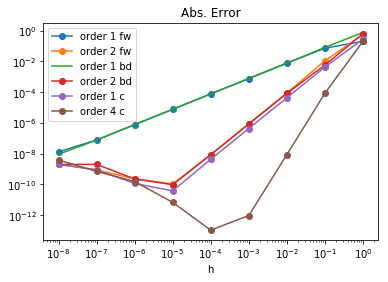

In [4]:
grid_pts = 9
h_grid = np.logspace(-8,0,grid_pts)
x0 = 1

df_an = df(x0)

err_fd = np.zeros_like(h_grid) 
err_bd = np.zeros_like(h_grid) 
err_c = np.zeros_like(h_grid)
err_fd2 = np.zeros_like(h_grid) 
err_bd2 = np.zeros_like(h_grid) 
err_c2 = np.zeros_like(h_grid)


for j_h, h in enumerate(h_grid):
    err_fd[j_h] = np.abs(df_an-df_fw(f,x0,h))
    err_bd[j_h] = np.abs(df_an-df_bw(f,x0,h))
    err_c[j_h] = np.abs(df_an-df_c(f,x0,h))
    err_fd2[j_h] = np.abs(df_an-df2_fw(f,x0,h))
    err_bd2[j_h] = np.abs(df_an-df2_bw(f,x0,h))
    err_c2[j_h] = np.abs(df_an-df2_c(f,x0,h))
    #print('forward 2',df2_fw(f,x0,h))

#print('err',err_fd2)
plt.figure()
plt.loglog(h_grid,err_fd,'-o',label='order 1 fw')
plt.loglog(h_grid,err_fd2,'-o',label='order 2 fw')

plt.loglog(h_grid,err_bd,label='order 1 bd')
plt.loglog(h_grid,err_bd2,'-o',label='order 2 bd')

plt.loglog(h_grid,err_c,'-o',label='order 1 c')
plt.loglog(h_grid,err_c2,'-o',label='order 4 c')

plt.legend()
plt.title('Abs. Error')
plt.xlabel('h')

#### I don't get the same graph

# Problem 5

In [5]:
def f(X):
    x = X[0] 
    y = X[1]
    f = np.transpose([x**2, x**3 - y])
    return f

x0 = [1,2]

vars = 2
I = np.eye(vars)
Jk = np.zeros_like(I)

h = 0.1

#Jac 
for i_e in range(vars):
    e = I[:,i_e]
    df = (f(x0-2*e*h)-8*f(x0-e*h)+8*f(x0+e*h)-f(x0+2*e*h))/(12*h)
    Jk[:,i_e] = df
    

print('Numeric Jacobian:',Jk)

Jk_by_hand = [[2*x0[0], 0], [3*x0[0]**2, -1]]

print('Analytic' ,Jk_by_hand)


Numeric Jacobian: [[ 2.  0.]
 [ 3. -1.]]
Analytic [[2, 0], [3, -1]]


# Problem 6

C:\Users\danie\Anaconda3\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


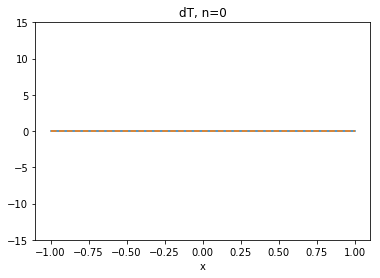

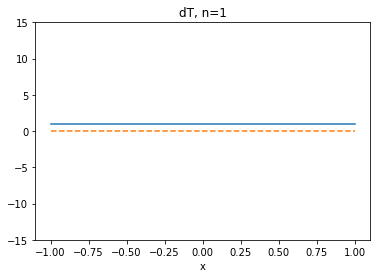

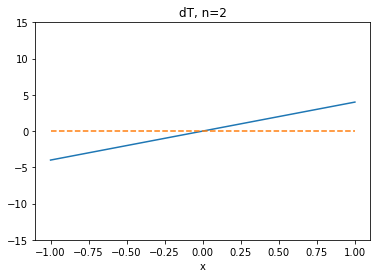

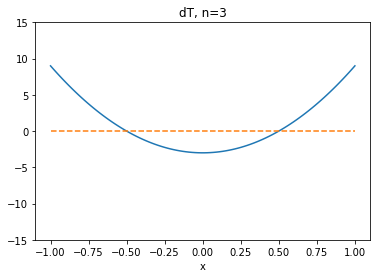

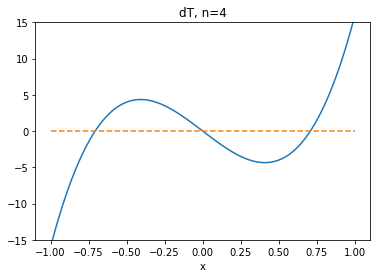

In [6]:
def T_fun(n,x):
    # Chebychev polynomial fn 
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2*x*T_fun(n-1,x) - T_fun(n-2, x)

gpts = 100
x_grid = np.linspace(-1,1,gpts)
dT_eval = np.zeros_like(x_grid)
T_eval = np.zeros_like(x_grid)



for n in range(5):    
    #T_eval = T_fun(x_grid,n)
    T_fun_curr = lambda x: T_fun(n,x)
    dT_fun = elementwise_grad(T_fun_curr)
    dT_eval = dT_fun(x_grid)
    #print('x',x_grid)
    #print('dT',dT_eval)
    #print('T',T_eval)    
    plt.figure()
    plt.plot(x_grid,dT_eval,x_grid,T_eval,'--')
    plt.title('dT, n='+str(n))
    axes = plt.gca()
    axes.set_ylim([-15,15])
    plt.xlabel('x')
    
